# Zadanie 5: Rozkłady $\alpha$-stabilne

Autorzy: *Joanna Matuszak*, *Olimpia Pozauć*, *Karolina Rakus*, *Joanna Wojciechowicz*.

## Wstęp teoretyczny

$\textbf{Zmienna losowa $X$ ma rozkład $\alpha$-stabilny}$, jeśli $\forall _{n \in \mathbb{N}} \exists_{C_n >0, D_n \in \mathbb{R}}$ takie, że $X_1 + \dots X_n \overset{\mathrm{d}}{=} C_nX+D_n$. Tutaj $X_1, \dots, X_n$ to niezależne kopie $X$ [3].

Równoważnie:

$\textbf{Rozkłady $\alpha$ -stabilne}$ to rozkłady o funkcji charakterystycznej postaci [3]:

$\varphi \left(\xi \right) = e^{i \mu \xi - \mid \sigma \xi\mid ^{\alpha} \left(1-i\beta sgn{\left(\xi\right)}\tan{\frac{\pi \alpha}{2}}\right)}$, $\alpha \neq 1$, $\xi \in \mathbb{R}$

$\varphi \left(\xi \right) = e^{i \mu \xi - \mid \sigma \xi\mid ^{\alpha} \left(1+i\beta sgn{\left(\xi\right)}\frac{2\log{\mid \xi \mid}}{\pi}\right)}$, $\alpha = 1$, $\xi \in \mathbb{R}$

gdzie $sgn\left(\xi\right) =  \begin{cases} 1, ~\xi>0 \\ 0, ~ \xi=0 \\ -1, ~ \xi<0 \end{cases}$

Parametry rozkładu stabilnego $S\left(\alpha,\beta,\mu,\sigma\right)$:


parametr stabilności $\alpha \in \left(0,2\right]$,

parametr skośności $\beta \in [-1,1]$ ($\beta=0$ rozkład symetryczny, $\beta>0$ rozkład skupiony bardziej na półprostej dodatniej, $\beta<0$ rozkład skupiony bardziej na półprostej ujemnej)

parametr skali $\sigma > 0$,

parametr lokalizacji (przesunięcia) $\mu \in \mathbb{R}$.





$\textbf{Symetryczne rozkłady stabilne}$ [1] (tzn. o gęstości symetrycznej względem osi $0y$) otrzymujemy dla $\beta=0,\mu=0$, parametry $c>0,0<\alpha \le 2$ - dowolne. Funkcja charaketrystyczna takiego rozkładu ma wtedy prostszą postać

\begin{equation}
\varphi\left(\xi\right) = e^{-\mid \sigma \xi \mid^{\alpha}},\xi \in \mathbb{R}.
\end{equation}

$\textbf{Definicja}$ [1]
Rozkłady stabilne z $\alpha<2$ (czyli inne niż rozkład normalny) mają tzw. $\textbf{ciężkie ogony}$. tzn. dla $Y$ o rozkładzie stabilnym $S\left(\alpha,\beta,\mu,\sigma\right)$ z $\alpha<2$ zachodzi przynajmniej jedna z własności:

\begin{align}
P\left(Y \ge x\right) \sim x^{-\alpha} \\
P\left(Y \le -x\right) \sim  x^{-\alpha},
\end{align}

przy $x \to \infty$.

Z własności ciężkich ogonów wynika, że dla $Y$ o rozkładzie stabilnym $S\left(\alpha,\beta,\mu\sigma\right)$ z $\alpha<2$ mamy

\begin{equation}
E\mid Y \mid ^{p} < \infty \Longleftrightarrow p<\alpha.
\end{equation}

W szczególności, wtedy $D^{2}Y = \infty$, a $EY$ istnieje tylko dla $\alpha>1$.
W przypadku $\alpha=2$, czyli gdy $Y$ ma rozkład  normalny, $E\mid Y\mid^{p}$ istnieje dla dowolnego $p>0$.

Rozklady z ciężkimi ogonami są to rozkłady, których ogony nie są ograniczone wykładniczo, tzn. mają grubsze ogony niż rozkład wykładniczy. Z dużym prawdopodobieństwem generowane są bardzo duże wartości, dlatego rozkłady ciężkoogonowe są trudne do przedstawienia na wykresach [2].

## Implementacja algorytmu generowania zmiennej losowej z rozkładu $\alpha$-stabilnego

Zaimplementujmy algorytm generowania zmiennej losowej z rozkładu $\alpha$-stabilnego. 
Algorytm [5]:

1. Generuj $U$ z rozkładu $U\left(\frac{-\pi}{2},\frac{\pi}{2}\right)$.
2. Generuj niezależnie $E$ z rozkładu wykładniczego $Exp\left(1\right)$.
3. Jeśli $\alpha \neq 1$ to $S = \left(1+\beta^{2} \left(\tan{\frac{\pi \alpha}{2}}\right)^{2}\right)^{\frac{1}{2\alpha}}$, $B=\frac{1}{\alpha}\arctan{\left(\beta \tan{\frac{\pi \alpha}{2}}\right)}$, $X=S\frac{\sin{\left(\alpha\left(U+B\right)\right)}}{\left(\cos{U}\right)^{\frac{1}{\alpha}}} \left(\frac{\cos{\left(U-\alpha\left(U+B\right)\right)}}{E}\right)^{\frac{1-\alpha}{\alpha}}$ i zwróć $Y=\sigma X+\mu$.
Jeśli $\alpha = 1$ to $X = \frac{2}{\pi} \left(\left(\frac{\pi}{2}+\beta U \right) \tan{U} - \beta \log{\left(\frac{\frac{\pi}{2} E \cos{U}}{\frac{\pi}{2}+\beta U}\right)}\right)$ i zwróć $Y=\sigma X + \frac{2}{\pi} \beta \sigma \log{\sigma} +\mu$.
                                                           

## Badanie poprawności algorytmu

Przedmiotem naszych badań będzie powyższy algorytm. Problem badawczy: czy powyższy algorytm rzeczywiście zwraca zmienną z rozkładu $\alpha$-stabilnego? Aby odpowiedzieć na to pytanie, porównamy histogramy z gęstościami teoretycznymi, dystrybuanty teoretyczne z empirycznymi i funkcje charakterystyczne teoretyczne z empirycznymi, zobaczymy też wykresy kwantylowe z prób oraz wykonamy odpowiednie testy zgodności.

Funkcja charakterystyczna dowolnego rozkładu $\varphi\left(t\right)$ z definicji to transformata Fouriera funkcji gęstosci tego rozkładu $f\left(x\right)$. Stąd gęstość rozkładu to odwrotna transformata Fouriera funkcji charakterystcznej:

$ \frac{1}{2\pi}\int_{-\infty}^{\infty} \varphi\left(t\right) e^{-ixt} dt $.

W ogólności dla rozkładów $\alpha$-stabilnych gęstości nie da się przedstawić w sposób analityczny (powyższa całka nie jest zdefiniowana). Jedynie w trzech przypadkach (dla konkretnych parametrów $\alpha,~\beta,~\mu,~\sigma$) możemy wyrazić ją za pomocą funkcji elementarnych. Poprawność algorytmu będziemy badać właśnie dla tych trzech przypadków, a na koniec przyjrzymy się sytuacji, gdy gęstości nie da się przedstawić w sposób analityczny [4].



### Dla $\alpha = \frac{1}{2}$

Funkcja charakterystyczna: $\varphi \left(\xi \right) = e^{i \mu \xi - \mid \sigma \xi\mid ^{\alpha} \left(1-i\beta sgn{\left(\xi\right)}\right)}$.

Jeśli dodatkowo określimy parametry $\beta=1,~\mu=0,~\sigma=a^{2}$, gdzie $a \neq 0$, to otrzymamy rozkład Levy'ego, którego gęstość może być zapisana w sposób analityczny.

Dla rozkładu Levy'ego:

Funkcja charakterystyczna: $\varphi \left(\xi \right) = e^{-\mid \xi \mid^{\frac{1}{2}} a \left(1-i sgn\left(\xi\right)\tan{\frac{\pi}{4}}\right)}$.

Gęstość: $f\left(x\right) = \frac{a}{\sqrt{2\pi}} x^{-\frac{3}{2}} e^{-\frac{a^{2}}{2x}}$, $x>0$, $a>0$.

Rozkład Levy'ego jest przykładem rozkładu z ciężkim ogonem, zatem jest trudny do przedstawienia na różnego rodzaju wykresach [1,4].

Unormowany histogram z próby i gęstość teoretyczna rozkładu $S\left(\frac{1}{2},1,0,1\right)$. W celu większej czytelności histogram i gęstość są przedstawione tylko dla zadanego zakresu na osi $0X$ i osi $0Y$.  

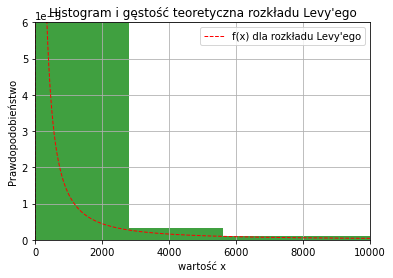

In [32]:
histogram_pdf_plot(1/2,1,0,1,"rozkładu Levy'ego",0,10000,0,0.00006,100)

Dystrybuanta teoretyczna i empiryczna. Wykresy dystrybuanty empirycznej i teoretycznej również są przedstawione na określonym zakresie na osi $0X$ w celu zwiększenia przejrzystości.

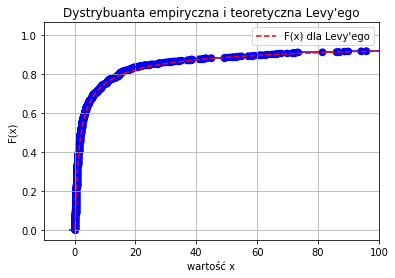

In [121]:
cdf_plot(1/2,1,0,1,"Levy'ego", -10,100)

Wykres kwantylowy z określonym zakresem na osi $0X$ w celu zwiększenia przejrzystości. 

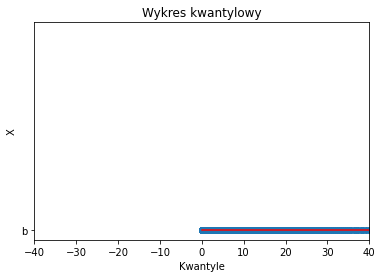

In [196]:
qq_plot(1/2,1,0,1)

Spójrzmy na wykres kwantylowy bez określonego zakresu na osi $0X$ z dodanymi przedziałami ufności. 

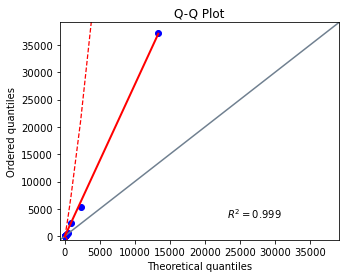

In [177]:
x = [stable_distribution(1/2,1,0,1) for i in range (100)]
ax = pg.qqplot(x, dist='levy_stable', sparams=(1/2,1))

Wykresy części rzeczywistej i części urojonej funkcji charakterystycznej, również na ustalonym zakresie osi $0X$. Zauważmy, że odchylenia wykresu części rzeczywistej i urojonej funkcji empirycznej od funkcji teoretycznej są bardzo małe, rzędu $0.1$. 

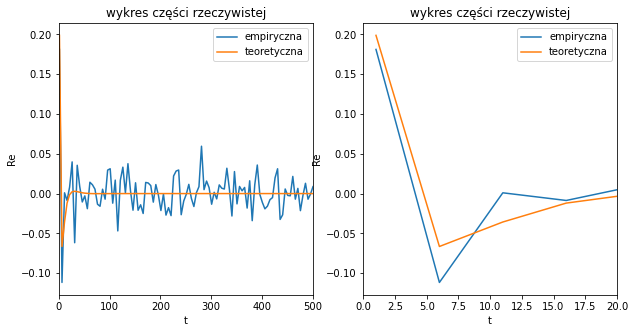

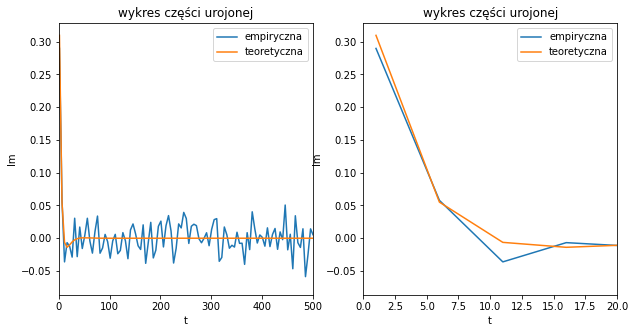

In [9]:
draw_charf(1/2,1,0,1)

Test zgodności Kołomogorowa-Smirnowa dla próby z algorytmu.

In [31]:
print("Test Kołomogorowa-Smirnowa potwierdza hipotezę o zgodności rozkładów dla",KS_test(1/2,1,0,1),"% prób.")

Test Kołomogorowa-Smirnowa potwierdza hipotezę o zgodności rozkładów dla 97 % prób.


### Dla $\alpha = 1$

Funkcja charakterystyczna: $\varphi \left(\xi \right) = e^{i \mu \xi - \mid \sigma \xi\mid ^{\alpha} \left(1+i\beta sgn{\left(\xi\right)}\frac{2\log{\mid \xi \mid}}{\pi}\right)}$.

Jeśli dodatkowo określimy parametry $\beta=0,~\mu=0,~\sigma=1$, to otrzymamy rozkład Cauchy'ego $C\left(0,1\right)$, którego gęstość może być zapisana w sposób analityczny.

Dla rozkładu Cauchy'ego:

Funkcja charakterystyczna: $\varphi \left(\xi\right) = e^{-\mid \xi \mid}$.

Gęstość: $f\left(x\right) = \frac{1}{\pi} \frac{1}{1+x^{2}}$.

Rozkład Cauchy'ego jest przykładem rozkładu z ciężkim ogonem, zatem jest trudny do przedstawienia na różnego rodzaju wykresach [1,4].

Unormowany histogram z próby i gęstość teoretyczna rozkładu $S\left(1,0,0,1\right)$. W celu większej czytelności histogram i gęstość są przedstawione tylko dla zadanego zakresu na osi $0X$ i osi $0Y$.  

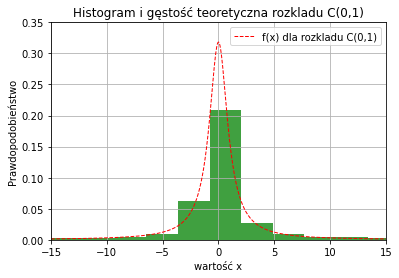

In [35]:
histogram_pdf_plot(1,0,0,1,"rozkladu C(0,1)",-15, 15,0,0.35,300 )

Dystrybuanta teoretyczna i empiryczna. Wykresy dystrybuanty teoretycznej i empirycznej również są przedstawione na określonym zakresie na osi $0X$ w celu zwiększenia przejrzystości.

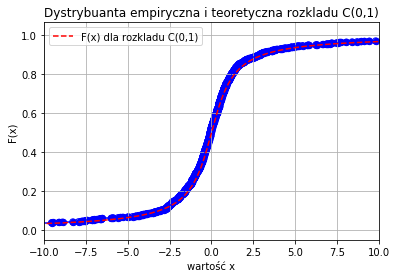

In [120]:
cdf_plot(1,0,0,1,"rozkladu C(0,1)",-10,10)

Wykres kwantylowy z określonym zakresem na osi $0X$ w celu zwiększenia przejrzystości. 

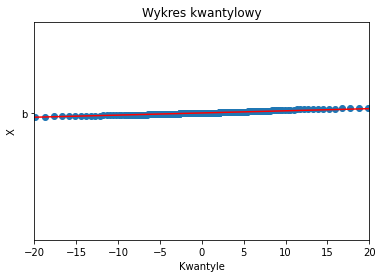

In [195]:
qq_plot(1,0,0,1)

Spójrzmy na wykres kwantylowy bez określonego zakresu na osi $0X$ z dodanymi przedziałami ufności.

/Users/asiawojciechowicz/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


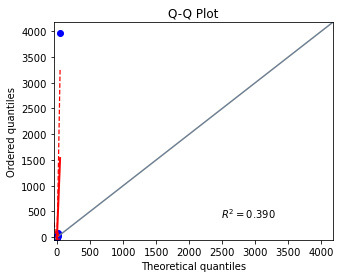

In [39]:
x = [stable_distribution(1,0,0,1) for i in range (100)]
ax = pg.qqplot(x, dist='levy_stable', sparams=(1,0))

Wykresy części rzeczywistej i części urojonej funkcji charakterystycznej, również na ustalonym zakresie osi $0X$. Zauważmy, że odchylenia wykresu części rzeczywistej i urojonej funkcji empirycznej od funkcji teoretycznej są bardzo małe, rzędu $0.1$. 

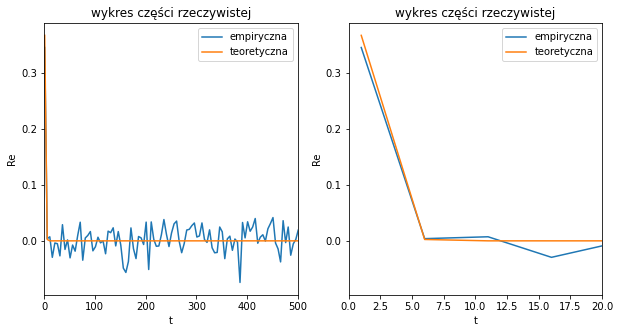

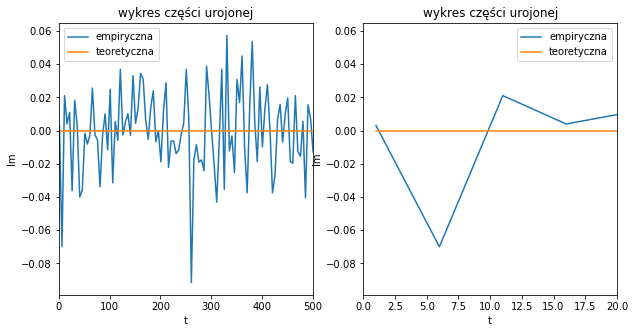

In [12]:
draw_charf(1,0,0,1)

Test zgodności Kołomogorowa-Smirnowa dla próby z algorytmu.

In [32]:
print("Test Kołomogorowa-Smirnowa potwierdza hipotezę o zgodności rozkładów dla",KS_test(1,0,0,1),"% prób.")

Test Kołomogorowa-Smirnowa potwierdza hipotezę o zgodności rozkładów dla 96 % prób.


### Dla $\alpha = 2$: Rozkład normalny $X \mbox{~} N\left(\mu,\sigma^{2}\right)$

Funkcja charakterystyczna: 
$\varphi\left(\xi\right) = e^{i \mu \xi - \mid \sigma \xi\mid ^{2}}$.

Gęstość:
$f\left(x\right) = \frac{1}{\sqrt{2\pi \sigma^{2}}}e^{\frac{-\left(x-\mu\right)^{2}}{2\sigma^{2}}} $.

Dystrybuanta: 
$F\left(x\right) = \int_{-\infty}^{x} f\left(x\right) dx = \frac{1}{2}\left(1+erf\frac{x-\mu}{\sigma \sqrt{2}}\right)$.

Powyższej całki nie da się obliczyć metodami analitycznymi. Stosuje się do tego inne metody np. tablice statystyczne (bądź też odpowiednie kalkulatory czy oprogramowanie komputerów). Dystrybuanta rozkładu normalnego jest definiowana za pomocą tzw. funkcji błędu [1,4].
 


Dodatkowo dla dowolnego $\beta$, $\mu=0$, $\sigma=\frac{\sqrt{2}}{2}$ otrzymujemy standardowy rozkład normalny $N\left(0,1\right)$. Zbadajmy teraz nasz algoryt właśnie dla takich parametrów.

Unormowany histogram z próby i gęstość teoretyczna rozkładu $S\left(2,0,0,\frac{\sqrt{2}}{2}\right)$. W celu większej czytelności histogram i gęstość są przedstawione tylko dla zadanego zakresu na osi $0X$ i osi $0Y$. 

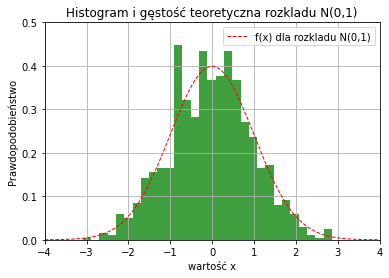

In [39]:
histogram_pdf_plot(2,0,0,np.sqrt(2)/2,"rozkładu N(0,1)",-4,4,0,0.5,30)

Dystrybuanta teoretyczna i empiryczna. Wykresy dystrybuanty teoretycznej i empirycznej również są przedstawione na określonym zakresie na osi $0X$ w celu zwiększenia przejrzystości.

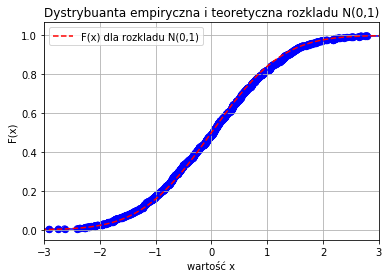

In [118]:
cdf_plot(2,1,0,np.sqrt(2)/2,"rozkladu N(0,1)",-3,3)

Wykres kwantylowy z określonym zakresem na osi $0X$ w celu zwiększenia przejrzystości. 

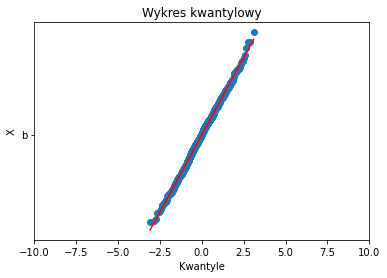

In [194]:
qq_plot(2,0,0,np.sqrt(2)/2) 

Spójrzmy na wykres kwantylowy bez określonego zakresu na osi $0X$ z dodanymi przedziałami ufności.

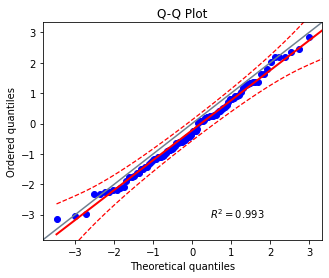

In [11]:
x = [stable_distribution(2,0,0,np.sqrt(2)) for i in range (100)]
ax = pg.qqplot(x, dist='levy_stable', sparams=(2,0))

Wykresy części rzeczywistej i części urojonej funkcji charakterystycznej, również na ustalonym zakresie osi $0X$. Zauważmy, że odchylenia wykresu części rzeczywistej i urojonej funkcji empirycznej od funkcji teoretycznej są bardzo małe, rzędu $0.1$. 

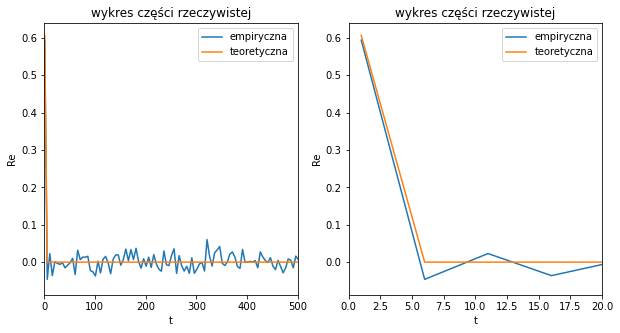

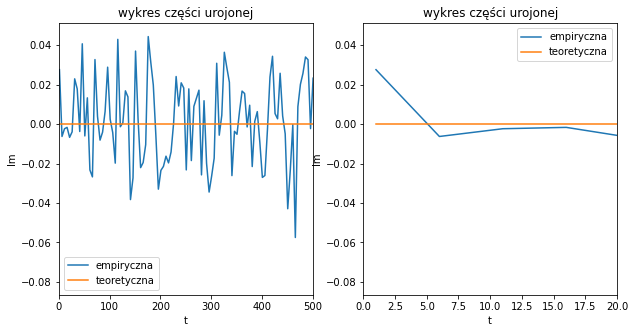

In [13]:
draw_charf(2,1,0,np.sqrt(2)/2)

Test zgodności Kołomogorowa-Smirnowa dla próby z algorytmu.

In [36]:
print("Test Kołomogorowa-Smirnowa potwierdza hipotezę o zgodności rozkładów dla",KS_test(2,1,0,np.sqrt(2)/2),"% prób.")

Test Kołomogorowa-Smirnowa potwierdza hipotezę o zgodności rozkładów dla 95 % prób.


W tym przypadku możemy również przeprowadzić test Shapiro-Wilka. Za jego pomocą sprawdzimy czy dane z próby pochodzą z rozkładu normalnego. Test ten stosuje się przeważnie dla małych prób $N<100$.

In [37]:
print("Test Shapiro-Wilka potwierdza hipotezę o zgodności rozkładu z rozkładem normalnym dla",ShapiroWilk_test(2,1,0,np.sqrt(2)/2),"% prób.")

Test Shapiro-Wilka potwierdza hipotezę o zgodności rozkładu z rozkładem normalnym dla 97 % prób.


### Dla $\alpha=\sqrt{2}$

Funkcja charakterystyczna: $\varphi \left(\xi \right) = e^{i \mu \xi - \mid \sigma \xi\mid ^{\sqrt{2}} \left(1-i\beta sgn{\left(\xi\right)}\tan{\frac{\sqrt{2} \pi}{2}}\right)}$.

Dla takiego parametru $\alpha$ niezależnie od wartości pozostałych parametrów $\beta,~\mu,~\sigma$ gęstość nie może być wyrażona przy pomocy funkcji elementarnych [1,4].

Rozkład ten ma tzw. ciężkie ogony, zatem jest trudny do przedstawienia na różnego rodzaju wykresach.

Unormowany histogram z próby i gęstość teoretyczna rozkładu $S\left(\sqrt{2},0,1,1\right)$. W celu większej czytelności histogram i gęstość są przedstawione tylko dla zadanego zakresu na osi $0X$ i osi $0Y$. 

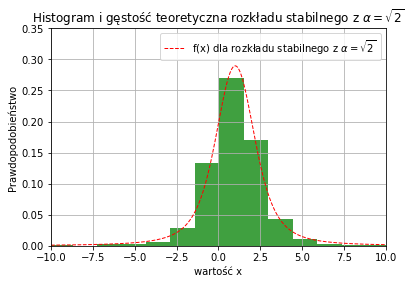

In [38]:
histogram_pdf_plot(np.sqrt(2),0,1,1,r"rozkładu stabilnego z $\alpha=\sqrt{2}$", -10, 10,0,0.35, 70)

Dystrybuanta teoretyczna i empiryczna. Wykresy dystrybuanty teoretycznej i empirycznej również są przedstawione na określonym zakresie na osi $0X$ w celu zwiększenia przejrzystości.

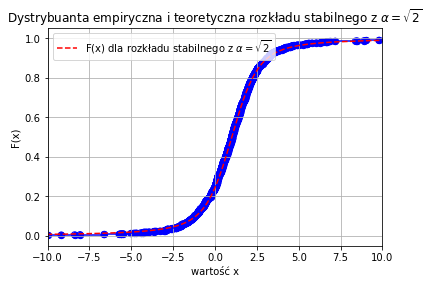

In [110]:
cdf_plot(np.sqrt(2),0,1,1,r"rozkładu stabilnego z $\alpha=\sqrt{2}$",-10,10)

Wykres kwantylowy z określonym zakresem na osi $0X$ w celu zwiększenia przejrzystości. 

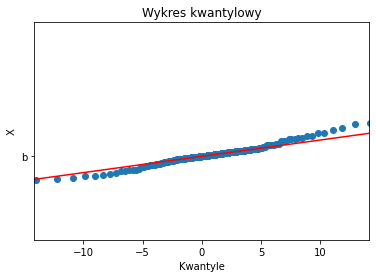

In [197]:
qq_plot(np.sqrt(2),0,1,1)

Spójrzmy na wykres kwantylowy bez określonego zakresu na osi $0X$ z dodanymi przedziałami ufności.

/Users/asiawojciechowicz/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


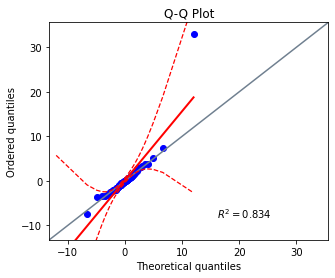

In [41]:
x = [stable_distribution(np.sqrt(2),0,1,1) for i in range (100)]
ax = pg.qqplot(x, dist='levy_stable', sparams=(np.sqrt(2),0))

Wykresy części rzeczywistej i części urojonej funkcji charakterystycznej, również na ustalonym zakresie osi $0X$. Zauważmy, że odchylenia wykresu części rzeczywistej i urojonej funkcji empirycznej od funkcji teoretycznej są bardzo małe, rzędu $0.1$. 

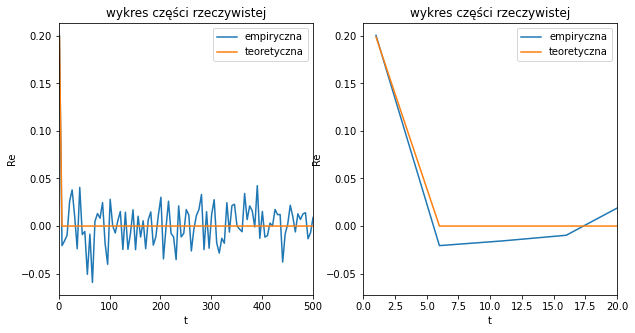

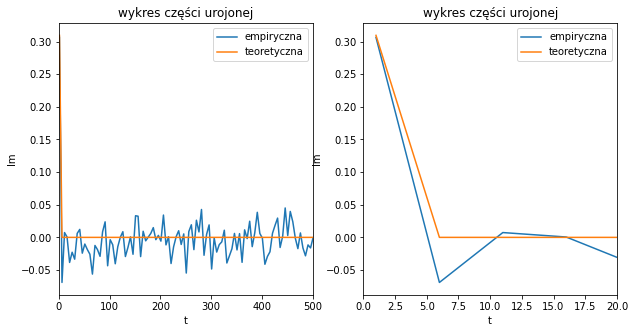

In [16]:
draw_charf(np.sqrt(2),0,1,1)

Test zgodności Kołomogorowa-Smirnowa dla próby z algorytmu.

In [34]:
print("Test Kołomogorowa-Smirnowa potwierdza hipotezę o zgodności rozkładów dla",KS_test(np.sqrt(2),0,1,1),"% prób.")

Test Kołomogorowa-Smirnowa potwierdza hipotezę o zgodności rozkładów dla 96 % prób.


### Podsumowanie

Po wykonaniu licznych testów, porównań histogramów z gęstościami, dystrybuant teoretycznych z empirycznymi, funkcji charakterystycznych teoretycznych z empirycznym oraz przyjrzeniu się wykresom kwantylowym możemy stwierdzić, że badany algorytm rzeczywiście generuje zmienne z rozkładu $\alpha$-stabilnego. Należy również wspomnieć, że rozkład Levy'ego i rozkład Cauchy'ego, które pojawiły się powyżej, to rozkłady ciężkoogonowe, które są trudne do wizualizacji na różnego rodzaju wykresach.

## Obszary przyciągania rozkładów stabilnych

Mówimy, że rozkład ${R}$ należy do obszaru przyciągania pewnego rozkładu stabilnego $S(\alpha, \beta, m, c)$, jeżeli dla ciągu $X_1, X_2, ...$ niezależnych zmiennych losowych o jednakowym rozkładzie ${R}$ istnieją ciągi stałych $a_n \in { R}$ , $b_n >0$, takie że

\begin{equation}
\frac{X_1 + ... X_n -a_n}{b_n} \xrightarrow[n \rightarrow \infty]{d} Y,
\end{equation}
gdzie $Y$ ma rozkład $S(\alpha, \beta, m, c)$ [1].

### Twierdzenie (warunki konieczne i wystarczające do przynależności do obszaru przyciągania stabilnego):

Rozkład $R$ o dystrybuancie $F(x)$ należy do obszaru przyciągania rozkładu stabilnego $S(\alpha, \beta, m, c)$ z indeksem stabilności $\alpha <2$ wtedy i tylko wtedy, gdy dla dowolnego $y>0$

$$
\lim_{x \rightarrow \infty }\frac{F(-xy)+1 - F(xy}{F(-x) +1 - F(x)}  = y^{-\alpha} 
$$

przy czym istnieją granice.

$$ \lim_{x \rightarrow \infty }\frac{1 - F(xy}{F(-x) +1 - F(x)} $$
 oraz $$\lim_{x \rightarrow \infty }\frac{F(-x)}{F(-x) +1 - F(x)}.  $$
 
 Warunki te oznaczają, że rozkład $F(x)$ ma asymptotycznie takie same ogony jak graniczny rozkład stabilny.
 
 Rozkład $R$ o dystrybuancie $R$ należy do obszaru przyciągania rozkadu normalnego wtedy i tylko wtedy, gdy dla dowolnego $y>0$
 
 $$
 \lim_{x \rightarrow \infty} \frac{\int_{\{|t| <xy\}} t^2dF(t)}{\int_{\{|t| <x\}} t^2dF(t)} =1.
 $$
 
Gdy wariancja rozkładu $R$ jest skończona i większa od 0, warunek powyższy jest spełniony. Nie są to jednak warunki równoważne. 
 
Jak widać, żeby stwierdzić, że rozkład należy do obszaru przyciągania pewnego rozkładu stabilnego, nie jest potrzebna szczególna wiedza o badanym rozkładzie, wystarczy znać asympototyczne zachowanie się dystrybuanty w $\pm \infty$ (dla $\alpha <2$ ) lub własność całkową dla rozkłady normalnego [1].

### Niesymetryczny Rozkład Pareto

Dystrybuanta:
$$ 
F(x) = 1- \left( \frac{1}{(1+Ax)^{\alpha}}\right),~A>0,~\alpha \in \left(0,2\right),~x>0
$$


Odwrotna dystrybuanta:
$$
X = F^{-1}(U) =
\frac{1}{A}\left( \left(\frac{1}{1-U}\right)^{\frac{1}{\alpha}} -1 \right),~U\left(0,1\right),~A>0,~\alpha \in \left(0,2\right)
$$

### Symetryczny Rozkład Pareto

Odwrotna dystrybuanta dla $A>0,~\alpha \in \left(0,2\right)$:
$$
X = F^{-1}(U) =
\left\{ \begin{array}{ll}
\frac{1}{A}\left( \left(\frac{1}{1-U}\right)^{\frac{1}{\alpha}} -1 \right) & \textrm{gdy $U>0.5$}\\
-\frac{1}{A}\left( \left(\frac{1}{1-U}\right)^{\frac{1}{\alpha}} -1 \right) & \textrm{gdy $U\leq 0.5$}\\
\end{array} \right.
$$

Rozkład Pareto jest rozkładem z ciężkim ogonem, zatem jest trudny do przedstawienia na różnego rodzaju wykresach [1].

Zaimplementujmy algorytm generowania zmiennej losowej z rozkładu niesymetrycznego Pareto. Algorytm:
1. Generuj $U$ z rozkładu $U\left(0,1\right)$.
2. Zwróć $X=\frac{1}{A}\left(\left(\frac{1}{1-U}\right)^{\frac{1}{\alpha}}-1\right)$



Zaimplementujmy teraz algorytm generowania zmiennej losowej z rozkładu symetrycznego Pareto. Zakładamy, że umiemy generować zmienną losową z rozkładu symetrycznego Pareto. Algorytm:
1. Generuj $U$ z rozkładu $U\left(0,1\right)$.
2. Jeśli $U>0.5$ to zwróć zmienną z rozkładu symetrycznego Pareto z parametrami A,$\alpha$. Jeśli $U<0.5$ to zwróć $\left(-1\right)$*zmienna z rozkładu symetrycznego Pareto z parametrami A,$\alpha$.

Zbadajmy czy powyższy algorytm generujący zmienną losową z rozkładu niesymetrycznego Pareto jest poprawny.

Porównanie histogramu z próby i gęstości teoretycznego rozkładu niesymetrycznego Pareto.

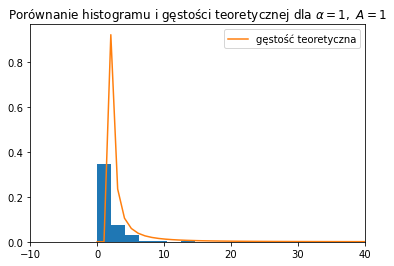

In [93]:
Pareto_pdf(1,1)

Porównanie dystrybuanty teoretycznej i empirycznej rozkładu niesymetrycznego Pareto.

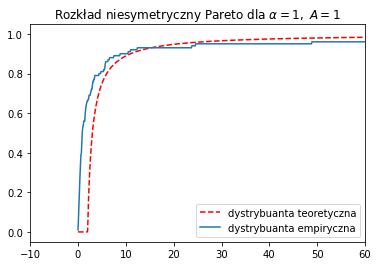

In [114]:
Pareto_dist(1,1)

Wykres kwantylowy z określonym zakresem na osi $0X$ w celu zwiększenia przejrzystości. 

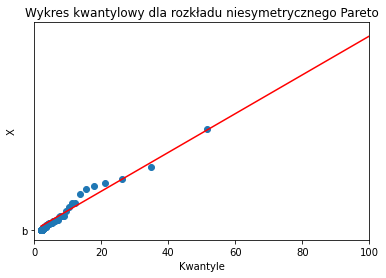

In [127]:
Paret_qq(1,1)

Spójrzmy na wykres kwantylowy bez określonego zakresu na osi $0X$ z dodanymi przedziałami ufności.

/Users/asiawojciechowicz/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


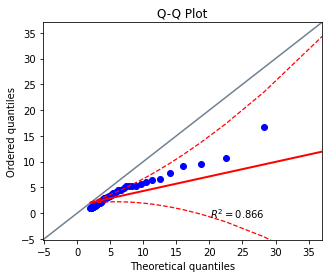

In [14]:
A, alfa =1,1
x = [asymmetric_Pareto_distribution(alfa, A) for i in range (100)]
ax = pg.qqplot(x, dist='pareto', sparams=(alfa, A))

Po porównaniu histogramu z gęstością teoretyczną, dystrybuanty empirycznej z teoretyczną i zobaczeniu wykresów kwantylowych możemy stwierdzić, że powyższy algorytm jest prawidłowy.

Histogram z próby z rozkładu symetrycznego Pareto na ograniczonym zakresie na osi $0X$ w celu zwiększenia przejrzystości. Zauważmy, że rzeczywiście jest on 'niemal' symetryczny.

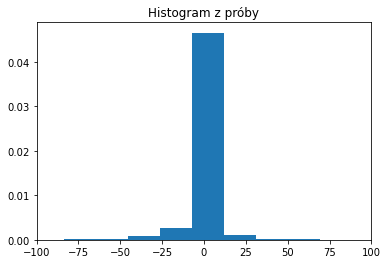

In [22]:
Y = symmetric_Pareto_distribution(1,1)
plt.hist(Y,density=True,bins=50);
plt.title('Histogram z próby')
plt.xlim(-100,100)
plt.show()

### Uogólnione Centralne Twierdzenie Graniczne 

X ma rozkład $\alpha$ - stabilny [3], jeśli istnieją: ciąg zmiennych losowych i.i.d. $(X_n)_{n=1}^{\infty}$, ciąg stałych dodatnich $(a_n)_{n=1}^{\infty}$ oraz ciąg stałych $(b_n)_{n=1}^{\infty}$ takie, że:

$$
\frac{X_1 +X_2 + ... X_n -b_n}{a_n} \xrightarrow[n \rightarrow \infty]{d} X,
$$
gdzie $X$ to zmienna losowa $\alpha$- stabilna.

W powyższej definicji $(a_n)$  musi mieć postać $a_n = n^{\frac{1}{\alpha}} \cdot l(n)$, gdzie $l(n)$ to tzw. funkcja wolno zmieniająca się (czyli $\forall_{c>0} \frac{l\left(c \cdot n\right)}{l\left(n\right)} \xrightarrow[n \rightarrow \infty]{} 1$).

Teraz sprawdzimy symulacyjnie uogólnione Centralne Twierdzenie Graniczne dla symetrycznego rozkładu Pareto z różnymi parametrami $A$, $\alpha$. Nasz problem badawczy: czy generowany przez nas symetryczny rozkład Pareto spełnia Uogólnione Centralne Twierdzenie Graniczne.

Porównanie histogramu z próby zmiennej zdefiniowanej w Uogólnionym Centralnym Twierdzeniu Granicznym i gęstości teoretycznej rozkładu $\alpha$-stabilnego z parametrami $\alpha$, $\beta$=0.

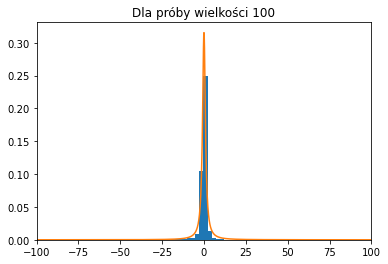

In [30]:
CTG(1,1,-100,100)

Wykres pierwszej wartości zwracanej przez kstest (określa ona odległość pomiędzy dystrybuantą naszej próby, a dystrybuantą teoretyczną zadanego rozkładu) w zależności od wielkości próby.

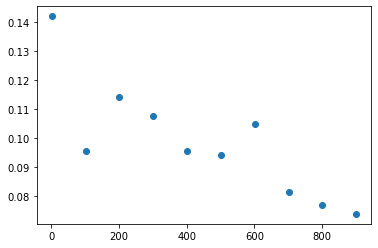

In [15]:
CTG2(1/2,1/2)

Test Kołomogorowa-Smirnowa.

In [71]:
print("Test Kołomogorowa-Smirnowa potwierdza hipotezę o zgodności rozkładów dla",KS_test_CTG_Pareto(1/2,1/2),"% prób.")

Test Kołomogorowa-Smirnowa potwierdza hipotezę o zgodności rozkładów dla 96 % prób.


Uogólnione Centralne Twierdzenie Graniczne zostało symulacyjnie potwierdzone różnymi sposobami: za pomocą porównania histogramu z próby z gęstością, wykresu przedstawiającego odległości pomiędzy dystrybuantantą teoretyczną i empiryczną oraz testu Kołomogorowa-Smirnowa dla licznych prób. Generowany przez nas symetryczny rozkład Pareto rzeczywiście spełnia Uogólnione Centralne Twierdzenie Graniczne, co mogliśmy zaobserwować na powyższych przykładach.

## Nieskończona podzielność rozkładów zmiennych ściśle stabilnych

Rozkład jest nieskończenie podzielny, jeśli dla każdego dla każdego $n \in \mathbb{N}$ da się przedstawić, jako rozkład sumy $n$ niezależnych zmiennych losowych o tym samym rozkładzie. Zmienna $X$ ma rozkład ściśle stabilny, jeśli dla każdego $n \in \mathbb{N}$ istnieją stałe $c_n$  takie, że $c_nX$ ma rozkład taki sam jak $\sum _{i=1}^n X_i$, gdzie $X_i$ są niezależnymi kopiami $X$. Stałe $c_n = n^{\frac{1}{\alpha}}$.

Nieskończoną podzielność sprawdzamy porównując histogram i dystrybuantę rozkładu $c_nX$ z rozkładem $\sum_{i=1} ^{n} \left(X_i\right)$.

Sprawdźmy teraz nieskończoną podzielność dla różnych przykładów rozkładów stabilnych. Nasz problem badawczy: czy generowane przez nas rozkłady ściśle stabilne są nieskończenie podzielne?

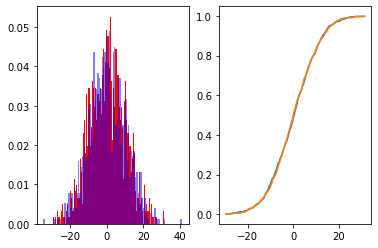

In [102]:
stability(2,1,0, np.sqrt(2)/2,100,1000)

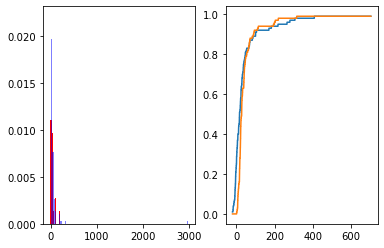

In [103]:
stability(1,1,1, 1,10,100)

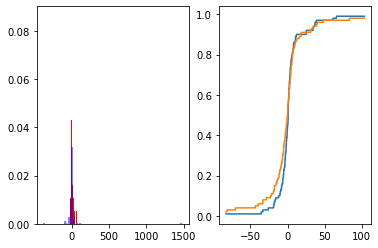

In [104]:
stability(1,0,0, 1,5,100)

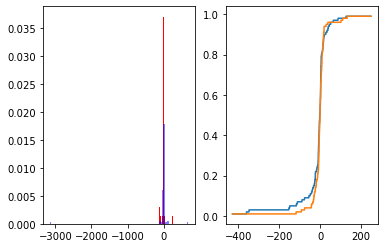

In [105]:
stability(1,0,0, 1,10,100)

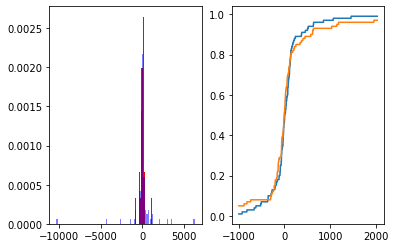

In [106]:
stability(1,0,0, 1,100,100)

W powyższych przykładach zarówno histogramy z prób i dystrybuanty pokrywają się. Możemy zatem stwierdzić, że nieskończona podzielność generowanych przez nas rozkładów ściśle stabilnych rzeczywiście zachodzi.

## Wnioski

Jak widać rozkłady $\alpha$-stabilne są bardzo rozległą i interesującą rodziną rozkładów, a powyższa praca pozwala na wgłębienie się w temat. Ciężkie ogony stanowiły jeden z głównych problemów przy wizualizacji danych z prób. W dalszych rozważaniach należałoby skierować swoją szczególną uwagę na ten problem. Zaproponowany przez  nas algorytm do generowania zmiennych losowych z rozkładu $\alpha$-stabilnego spełnia swoją funkcję. Zaimplementowany algorytm do generowania zmiennych z rozkładu symetrycznego Pareto spełnia Uogólnione Centralne Twierdzenie Graniczne, co zostało pokazane symulacyjnie. Tym samym sposobem została potwierdzona nieskończona podzielność generowanych przez nas rozkładów zmiennych ściśle stabilnych.

## Źródła

[1] http://prac.im.pwr.wroc.pl/~agniesz/rachunek_prawd_MAT1332/files/R_Pr_MAP1181_wyklad13_rozklady_stabilne.pdf

[2] https://wydawnictwo.umk.pl/upload/samples/Teoria_wartosci_ekstremalnych_1-10.pdf

[3] Politechnika Wrocławska kurs Modelowanie stochastyczne Marcin Magdziarz

[4] https://en.wikipedia.org/wiki/Stable_distribution

[5] prof. R. Weron

## Kod

In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
import random
import statsmodels.api as sm
import pingouin as pg

In [3]:
def stable_distribution(alfa, beta, mu, sigma):
    """
    Funkcja zwraca zmienną losową z rozkładu alpha-stabilnego.
    
    Argumenty:
    alpha - parametr stabilności, 0<alpha<=2
    beta - parametr skośności, -1<=beta<=1
    mi - parametr lokalizacji, mi należy do R
    sigma - parametr skali, sigma>0
    """
    U = np.random.uniform(-np.pi/2, np.pi/2 )
    E = np.random.exponential(1)
    if alfa != 1:
        S = (1+beta**2 *(np.tan(np.pi*alfa/2)**2))**(1/(2*alfa))
        B = 1/alfa *np.arctan(beta*np.tan(np.pi*alfa/2))
        X = S* (np.sin(alfa*(U+B)))/(np.cos(U))**(1/alfa) * ((np.cos(U-alfa*(U+B)))/(E))**((1-alfa)/alfa)
        return sigma*X + mu
    else:
        X = 2/np.pi*((np.pi/2)+beta*U)*np.tan(U) - beta*np.log((np.pi * E *np.cos(U))/(np.pi/2 + beta*U))
        return sigma*X + 2/np.pi * beta*sigma*np.log(sigma) + mu

In [ ]:
def histogram_pdf_plot(alfa, beta, mu, sigma, name, xp, xk, yp, yk, bins,n=1000):
    """
    Funkcja rysująca gęstość teoretyczną dla zadanego rozkładu
    oraz histogram dla zmiennych z rozkładu stabilnego o parametrach
    alfa, beta, mu, sigma.
    
    Argumenty:
    alfa, beta, mu, sigma - parametry rozkładu stabilnego
    name - nazwa rozkładu
    xp, xk - określenie zakresu na osi 0X
    yp, yk - określenie zakresu na osi 0Y
    n - wielkość próby
    """
    X= [stable_distribution(alfa, beta, mu, sigma) for i in range (n)]
    
    plt.hist(X, bins=bins, density=True, facecolor='green', alpha=0.75)
    x = np.linspace(xp,xk, 1000)
    
    plt.plot(x, stats.levy_stable.pdf(x ,alfa, beta, mu, sigma), 'r--', linewidth=1, 
                              label="f(x) dla {}".format(name))
    
    plt.xlabel('wartość x')
    plt.ylabel('Prawdopodobieństwo')
    plt.legend()
    plt.title("Histogram i gęstość teoretyczna {}".format(name))
    plt.xlim(xp, xk)
    plt.ylim(yp,yk)
    plt.grid(True)
    plt.show()

In [ ]:
def demp(X, x):
    """
    Funkcja zwracająca wartość dystrybuanty empirycznej próby X w punkcie x.
    
    Argumenty:
    X - próba losowa rozmiaru n
    x - liczba rzeczywista
    """
    n = len(X)
    suma = 0
    for i in range(n):
        if X[i] <= x:
            suma += 1
    
    return suma/n

In [ ]:
def cdf_plot(alfa, beta, mu, sigma, name, xp, xk, n=1000):
    """
    Funkcja rysująca dystrybunatę teoretyczną dla zadanego rozkładu 
    oraz empiryczną dla zmiennych z rozkładu stabilnego o paramterach alfa, beta, mu, sigma.
    
    Argumenty:
    alfa, beta, mu, sigma - parametry rozkładu stabilnego
    name - nazwa rozkładu
    xp, xk - określenie zakresu na osi 0X
    n - wielkość próby
    """
    X= [stable_distribution(alfa, beta, mu, sigma) for i in range (n)]
    X.sort()
    
    fig, ax = plt.subplots()
    
    for i in range(len(X)+1):
        if i == 0:
            ax.hlines(0, X[i]-2, X[i], color='blue')
            ax.scatter(X[i], demp(X, X[i]), color='blue', s=40)
            ax.scatter(X[i], 0, facecolors='none', edgecolors='blue', s=40)
            
        elif i == len(X):
            ax.hlines(1, X[i-1], X[i-1]+2, color='blue')
            
        else:
            ax.hlines(demp(X, X[i-1]), X[i-1], X[i], color='blue')
            ax.scatter(X[i], demp(X, X[i]), color='blue', s=40)
            ax.scatter(X[i], demp(X, X[i-1]), facecolors='none', edgecolors='blue', s=40)  

    
    plt.plot(X, stats.levy_stable.cdf(X,alfa, beta, mu, sigma), 'r--', linewidth=1.5, 
                              label="F(x) dla {}".format(name))
    
    plt.xlabel('wartość x')
    plt.ylabel('F(x)')
    plt.legend()
    plt.title("Dystrybuanta empiryczna i teoretyczna {}".format(name))
    plt.xlim(xp,xk)
    plt.grid(True)
    plt.show()

In [ ]:
def drawqq(X, distr, alfa, beta, mu, sigma):
    """
    Funkcja rysuje wykres kwantylowy QQ-plot.
    
    Argumenty:
    X - próba losowa(lista)
    distr - jednoargumentowa funkcja o wartosciach w [0,1] (która reprezentuje dystrybuantę teoretyczną)
    """
    
    X.sort()
    N = len(X) + 1
    quintiles = []
    
    for i in range(1, N):
        quintiles.append(distr.ppf(i/N, alfa, beta, mu, sigma)) #dla każdego i liczymy kwantyl teorytyczny q(x) rzędu i/N
        
    plt.plot(quintiles, X, 'o','b')
    plt.plot(quintiles, quintiles, 'r') 
    plt.xlabel('Kwantyle')
    plt.ylabel('X')
    plt.xlim(-20/alfa,20/alfa)
    plt.title('Wykres kwantylowy')
    plt.show()

In [ ]:
def qq_plot(alfa, beta, mu, sigma, n=1000):
    """
    Funkcja zwraca wykres kwantylowy dla próby z rozkładu alpha-stabilnego.
    
    Argumenty:
    alfa, beta, mu, sigma - parametry rozkładu alpha-stabilnego
    n - rozmiar próby
    """
    X= [stable_distribution(alfa, beta, mu, sigma) for i in range (n)]
    drawqq(X, stats.levy_stable, alfa, beta, mu, sigma)

In [ ]:
def char_func(ksi, alfa, beta, mu , sigma):
    """
    Funkcja zwraca wartość funkcji charakterystycznej rozkładu stabilnego z parametrami alfa, beta, mu, sigma 
    w punkcie ksi.
    
    Argumenty:
    ksi - argument funkcji charakterystycznej
    alfa, beta, mu, sigma - parametry rozkładu stabilnego
    """
    if alfa != 1:
        return np.exp(1j*mu*ksi - abs(sigma*ksi)**alfa*(1 - 1j*beta*np.sign(ksi) *np.tan(np.pi*alfa/2)))
    else:
        return np.exp(1j*mu*ksi - abs(sigma*ksi)**alfa*(1 + 1j*beta*np.sign(ksi) *2 *np.log(abs(ksi))/np.pi))

In [ ]:
def empchar(X,ksi):
    """
    Funkcja zwraca oszacowanie funkcji charakterystycznej rozkładu zmiennej X w punkcie ksi.
    Argumenty:
    X - próba losowa
    ksi - argument >0
    """
    n = len(X)
    phi_real=0
    phi_imag=0
    for i in range(n):
        phi_real = phi_real + np.cos(ksi*X[i])
        phi_imag = phi_imag + np.sin(ksi*X[i])
    return complex(phi_real/n, phi_imag/n)

In [ ]:
def draw_charf( alfa, beta, mu , sigma, n=1000):
    """
    Funkcja rysuje wykresy części rzeczywistej oraz części urojonej funkcji charakterystycznej - 
    empirycznej i teoretycznej - rozkładu stabilnego z parametrami alfa, beta, mu, sigma.
    
    Argumenty:
    alfa, beta, mu, sigma - argumenty rozkładu stabilnego
    n - wielkość próby
    """
    X = [stable_distribution(alfa, beta, mu, sigma) for i in range(n)]
    ts = np.arange(1, 1000, 5)
    results1 = [empchar(X, t).real for t in ts]
    results2 = [char_func(t, alfa, beta, mu , sigma).real for t in ts]
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(ts, results1, label="empiryczna")
    plt.plot(ts, results2, label="teoretyczna")
    plt.title("wykres części rzeczywistej")
    plt.xlabel('t')
    plt.ylabel('Re')
    plt.xlim(0,500)
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(ts, results1, label="empiryczna")
    plt.plot(ts, results2, label="teoretyczna")
    plt.title("wykres części rzeczywistej")
    plt.xlabel('t')
    plt.ylabel('Re')
    plt.xlim(0,20)
    plt.legend()
    plt.show()

    ts = np.arange(1, 1000, 5)
    results1 = [empchar(X, t).imag for t in ts]
    results2 = [char_func(t, alfa, beta, mu , sigma).imag for t in ts]
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(ts, results1, label="empiryczna")
    plt.plot(ts, results2, label="teoretyczna")
    plt.title("wykres części urojonej")
    plt.xlabel('t')
    plt.ylabel('Im')
    plt.xlim(0,500)
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(ts, results1, label="empiryczna")
    plt.plot(ts, results2, label="teoretyczna")
    plt.title("wykres części urojonej")
    plt.xlabel('t')
    plt.ylabel('Im')
    plt.xlim(0,20)
    plt.legend()
    plt.show()

In [ ]:
def KS_test(alfa,beta,mu,sigma,n=1000,alpha=0.05):
    """
    Funkcja zwraca wynik testu KS dla próby z rozkładu stabilnego z parametrami alfa, beta, mu ,sigma.
    
    Argumenty:
    alfa, beta, mu, sigma - parametry rozkładu stabilnego
    n - rozmiar próby
    alpha - poziom istotności
    """
    count = 0
    for i in range(100):
        X = [stable_distribution(alfa, beta, mu, sigma) for i in range (n)]
        if stats.kstest(X, 'levy_stable', (alfa,beta,mu,sigma)).pvalue>alpha:
            count += 1
    return count

In [ ]:
def ShapiroWilk_test(alfa, beta, mu, sigma, n=90): #sprawdza czy dane pochodza z rozkl normalnego
    """
    Funkcja zwraca wynik testu Shapiro-Wilka dla próby z rozkładu stabilnego z parametrami alfa, beta, mu, sigma
    
    Argumenty:
    alfa, beta, mu, sigma - parametry rozkładu stabilnego
    n - liczność próby
    """
    count = 0
    for i in range(100):
        X = [stable_distribution(alfa, beta, mu, sigma) for i in range (n)]
        if stats.shapiro(X).pvalue>0.05:
            count +=1
    return count

In [ ]:
def asymmetric_Pareto_distribution(A,alfa):
    """
    Funkcja zwraca zmienną losową z rozkładu niesymetrycznego Pareto z parametrami A, alfa.
    
    Argumenty:
    A, alfa - parametry rozkładu
    """
    u = np.random.uniform(0,1)
    x = ((1-u)**(-1/alfa)-1)/A
    return x

In [ ]:
def Pareto_pdf(alfa, A):
    """
    Funkcja zwracająca porównanie histogramu i gęstości teoretycznej niesymetrycznego rozkładu Pareto.
    
    Argumenty:
    A, alfa - parametry rozkładu
    """
    P = [asymmetric_Pareto_distribution(A, alfa) for i in range(100)]
    plt.hist(P, density=True, bins=50);
    x = np.linspace(0,50)
    plt.plot(x, stats.pareto.pdf(x,alfa, A), label='gęstość teoretyczna')
    plt.title(r'Porównanie histogramu i gęstości teoretycznej dla $\alpha={},~A={}$'.format(alfa, A))
    plt.legend()
    plt.xlim(-10,40)
    plt.show()

In [ ]:
def Pareto_dist(alfa, A):
    """
    Funkcja zwracająca porównanie dystrybuanty teoretycznej i empirycznej niesymetrycznego rozkładu Pareto.
    
    Argumenty:
    A, alfa -parametry rozkładu
    """

    P = [asymmetric_Pareto_distribution(A,alfa) for i in range(100)]
    X = np.arange(min(P), max(P), 0.1)
    plt.plot(X, stats.pareto.cdf(X, alfa, A), 'r--', linewidth=1.5, 
                              label="dystrybuanta teoretyczna")
    dist_emp = [demp(P,i) for i in X]  
    plt.plot(X, dist_emp, label = "dystrybuanta empiryczna")
    plt.legend()
    plt.xlim(-10,60)
    plt.title(r"Rozkład niesymetryczny Pareto dla $\alpha={},~A={}$".format(alfa, A))
    plt.show()

In [ ]:
def Paret_qq(A, alfa):
    """
    Funkcja zwracająca wykres kwantylowy niesymetrycznego rozkładu Pareto.
    Argumenty:
    A, alfa -parametry rozkładu
    """

    X= [asymmetric_Pareto_distribution(A,alfa) for i in range (100)]
    X.sort()
    N = len(X) + 1
    quintiles = []

    for i in range(1, N):
        quintiles.append(stats.pareto.ppf(i/N, alfa, A)) #dla każdego i liczymy kwantyl teorytyczny q(x) rzędu i/N

    plt.plot(quintiles, X, 'o','b') #punkty (q(x),x)
    plt.plot(quintiles, quintiles, 'r') #y=x
    plt.xlabel('Kwantyle')
    plt.ylabel('X')
    plt.xlim(0,100)
    plt.title('Wykres kwantylowy dla rozkładu niesymetrycznego Pareto')
    plt.show()

In [ ]:
def symmetric_Pareto_distribution(A, alfa, n=1000):
    """
    Funkcja generująca n liczb z rozkładu symetrycznego Pareto z parametrami alfa, A.
    
    Argumenty:
    alfa, A - parametry rozkładu
    n - rozmiar próby
    """

    X = []
    for i in range(n):
        U=random.uniform(0,1)
        if U>0.5:
            X.append(asymmetric_Pareto_distribution(A,alfa))
        else:
            X.append(-asymmetric_Pareto_distribution(A,alfa))
    return X 

In [ ]:
def CTG(A, alfa, xp, xk, n=100):
    """
    Funkcja sprawdza symulacyjnie uogólnione Centralne Twierdzenie Graniczne dla rozkładu symetrycznego Pareto
    z parametrami A, alfa. Rysuje porównanie histogramu z próby i gęstości teoretycznej rozkładu alfa stabilnego
    z parametrem alfa, beta = 0.
    
    Argumenty:
    A, alfa - parametry rozkładu symetrycznego Pareto
    n - wielkość próby do badania 
    """
    c_infty = 2*(1/A**alfa)
    c_A_infty = (2*math.gamma(alfa)*np.sin(np.pi*alfa/2)/(np.pi*c_infty))
    
    x = np.linspace(xp,xk,1000)
    X = [c_A_infty*np.sum(symmetric_Pareto_distribution(A, alfa, n))/n**(1/alfa) for i in range(100)]
    plt.hist(X,bins=50,density=True);
    plt.plot(x,stats.levy_stable.pdf(x,alfa,0))
    plt.title("Dla próby wielkości {}".format(n))
    plt.xlim(xp,xk)
    plt.show()

In [ ]:
def CTG2(A, alfa, alpha=0.05):
    """
    Funkcja sprawdza symulacyjnie uogólnione Centralne Twierdzenie Graniczne dla rozkładu symetrycznego Pareto
    z parametrami A, alfa. Rysuje wykres pierwszej wartości zwracanej przez kstest dla zmiennej losowej
    zdefiniowanej w Uogólnionym Centralnym Twierdzeniu Granicznym w zależności od wielkości próby.
    
    Argumenty:
    A, alfa - parametry rozkładu symetrycznego Pareto
    n - wielkość próby do badania 
    """
    c_infty = 2*(1/A**alfa)
    c_A_infty = (2*math.gamma(alfa)*np.sin(np.pi*alfa/2)/(np.pi*c_infty))
    NN=np.arange(1,1000,100)
    nn=[]
    for n in NN:
        X = [c_A_infty*np.sum(symmetric_Pareto_distribution(A, alfa, n))/n**(1/alfa) for i in range(100)]
        nn.append(stats.kstest(X, 'levy_stable', (alfa,0)).statistic)
    plt.scatter(NN,nn)

In [ ]:
def KS_test_CTG_Pareto(A, alfa, alpha=0.05, n=500): 
    """
    Funkcja zwraca procent, dla jakich kstest potwierdził hipotezę o zgodności rozkładu z próby 
    z rozkładem alfa stabilnym z parametrami alfa, beta=0.
    
    Argumenty:
    A, alfa - parametry symetrycznego rozkładu Pareto
    alpha - poziom istotności
    n - wielkość próby z rozkładu symetrycznego Pareto
    """
    c_infty = 2*(1/A**alfa)
    c_A_infty = (2*math.gamma(alfa)*np.sin(np.pi*alfa/2)/(np.pi*c_infty))
    count = 0
    for i in range(100):
        M = [c_A_infty*np.sum(symmetric_Pareto_distribution(A, alfa, n))/n**(1/alfa) for i in range(100)]
        if stats.kstest(M, 'levy_stable', (alfa,0)).pvalue>alpha:
            count += 1
    return count 

In [ ]:
def stability(alfa, beta, mu ,sigma, n, N=1000):
    """
    Funkcja sprawdza nieskończoną podzielność rozkładów zmiennych ściśle stabilnych. 
    Zwraca porównanie histogramów i dystrybuant rozkładów z definicji.
    
    Argumenty:
    alfa, beta, mu, sigma - parametry rozkładu stabilnego
    N, n - rozmiary prób
    """
    
    cnX = [stable_distribution(alfa,beta,mu,sigma)*n**(1/alfa) for _ in range(N)] #niezalezne kopie
    sumy = [sum([stable_distribution(alfa,beta,mu,sigma) for i in range(n)]) for i in range(N)] #2 wektor
 
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    ax1.hist(cnX, bins=100 , density=True, color = 'r');
    ax1.hist(sumy, bins=100 , density=True, color ='b', alpha=0.5);
    
    
    dist_cnX = []
    dist_sumy = []
    X = np.arange(min(cnX), max(cnX), 0.1)
    
    for i in X:
        dist_cnX.append(demp(cnX,i))
        dist_sumy.append(demp(sumy,i))
    
    ax2.plot(X, dist_cnX)
    ax2.plot(X, dist_sumy)
        
    plt.show()